In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math
import numpy as np

In [2]:
df = pd.read_csv('all_reviews.csv')

In [3]:
posScore = df['Score'].quantile(.5)

In [4]:
print(df.columns)
print("50th Percentile at",posScore)

Index(['Year', 'Date', 'User', 'Release', 'Score', 'Band'], dtype='object')
50th Percentile at 83.0


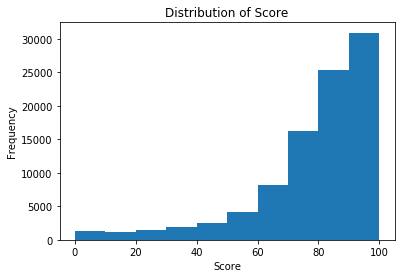

In [5]:
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.hist(df['Score'])
plt.savefig("Distribution of Score.png")

In [6]:
mp = {}
for i in range(len(df)):
    if df['Score'][i] > posScore:#positive review is defined as 50th percentile or above
    #if df['Score'][i] == 100:#only consider positive review as full score of 100
        if df['Release'][i] not in mp:
            mp[df['Release'][i]] = []
        mp[df['Release'][i]].append((df['User'][i],float(df['Score'][i])))

In [7]:
G = nx.Graph()
edges = {}
maxGroupSize = 0
print(len(mp))
for item in mp:
    for i in range(len(mp[item])):#every pair of reviews of the same release
        for j in range(i+1,len(mp[item])):
            #G.add_edge(mp[item][i][0],mp[item][j][0], weight = 1)#weight is the average of two ratings
            if (mp[item][i][0],mp[item][j][0]) in edges:
                edges[(mp[item][i][0],mp[item][j][0])] += 1
            elif (mp[item][j][0],mp[item][i][0]) in edges:
                edges[(mp[item][j][0],mp[item][i][0])] += 1
            else:
                edges[(mp[item][j][0],mp[item][i][0])] = 1
    maxGroupSize = max(maxGroupSize, len(mp[item]))

for edge in edges:
    G.add_edge(edge[0], edge[1], weight = edges[edge])

23182


In [8]:
print("Maximum number of users per release =",maxGroupSize)

Maximum number of users per release = 26


In [9]:
#Assigning weights based on frequency
weights = [G[u][v]['weight'] for u,v in G.edges()]

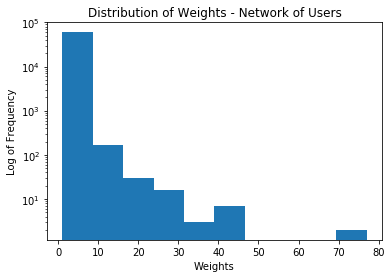

In [29]:
plt.title('Distribution of Weights - Network of Users')
plt.xlabel('Weights')
plt.ylabel('Log of Frequency')
plt.hist(weights, log = True)
plt.savefig("Distribution of Weights - Network of Users.png")

In [11]:
print("Maximum Weight (i.e. Frequency) =",max(weights))
print("Number of edges =",len(weights))
print("Number of nodes =",len(G.nodes()))

Maximum Weight (i.e. Frequency) = 77
Number of edges = 60136
Number of nodes = 6118


(array([5.801e+03, 1.920e+02, 6.900e+01, 2.200e+01, 9.000e+00, 6.000e+00,
        1.100e+01, 4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000e+00, 7.43500e+01, 1.47700e+02, 2.21050e+02, 2.94400e+02,
        3.67750e+02, 4.41100e+02, 5.14450e+02, 5.87800e+02, 6.61150e+02,
        7.34500e+02, 8.07850e+02, 8.81200e+02, 9.54550e+02, 1.02790e+03,
        1.10125e+03, 1.17460e+03, 1.24795e+03, 1.32130e+03, 1.39465e+03,
        1.46800e+03]),
 <a list of 20 Patch objects>)

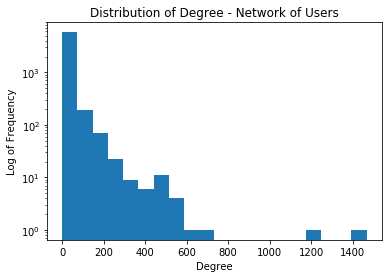

In [32]:
plt.title('Distribution of Degree - Network of Users')
plt.xlabel('Degree')
plt.ylabel('Log of Frequency')
plt.hist([b for a,b in G.degree(list(G.nodes()))],log = True, bins = 20)
#plt.savefig("Distribution of Degree.png")
#print([b for a,b in G.degree(list(G.nodes()))])
#Hopefully able to observe Power Law Distribution

In [13]:
#Only run this when size is small
#nx.draw(G, node_size = 10, width = weights)
#plt.show()

In [14]:
#Splitting the graph into connected subgraphs
'''
graphs = list(nx.connected_components(G))

for subgraph in graphs:
    if len(subgraph) < 3:#only consider subgraphs with size > 3
        continue
    graph = G.subgraph(subgraph)
    weights1 = [graph[u][v]['weight'] for u,v in graph.edges()]
    nx.draw(graph, node_size = 10, width = weights1)
    plt.show()
'''

"\ngraphs = list(nx.connected_components(G))\n\nfor subgraph in graphs:\n    if len(subgraph) < 3:#only consider subgraphs with size > 3\n        continue\n    graph = G.subgraph(subgraph)\n    weights1 = [graph[u][v]['weight'] for u,v in graph.edges()]\n    nx.draw(graph, node_size = 10, width = weights1)\n    plt.show()\n"

In [15]:
B = nx.Graph() #bipartite graph
H = nx.Graph() #network of releases

In [16]:
for release in mp:
    for item in mp[release]:
        B.add_edge(release,str(item[0])+'U')#to differentiate items in bipartite graph

edgesNew = {}
for release in mp:
    for item in B.adj[release]:
        for node in B.adj[item]:
            if node != release:
                if (release, node) in edgesNew:
                    edgesNew[(release, node)] += 1
                elif (node, release) in edgesNew:
                    edgesNew[(node, release)] += 1
                else:
                    edgesNew[(release, node)] = 1
                
for edge in edgesNew:
    H.add_edge(edge[0], edge[1], weight = edgesNew[edge])

#Assigning weights based on frequency
weightsNew = [H[u][v]['weight'] for u,v in H.edges()]

In [18]:
print("Number of Nodes =",len(H.nodes()))
print("Number of Edges =",len(H.edges()))
print("Maximum Weight =",max(weightsNew))
print("Minimum Weight =",min(weightsNew))

Number of Nodes = 21668
Number of Edges = 2373898
Maximum Weight = 22
Minimum Weight = 2


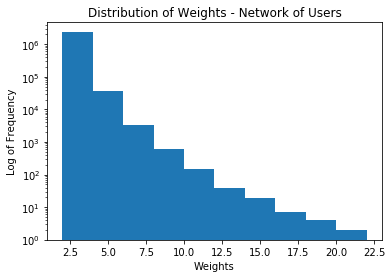

In [25]:
plt.title('Distribution of Weights - Network of Users')
plt.xlabel('Weights')
plt.ylabel('Log of Frequency')
plt.hist(weightsNew, log = True)
plt.savefig("Distribution of Weights - Network of Users.png")

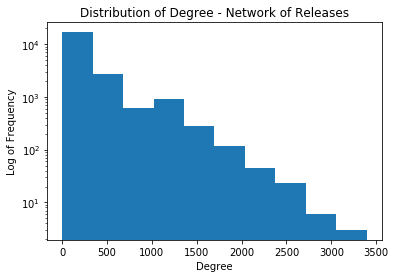

In [24]:
plt.title('Distribution of Degree - Network of Releases')
plt.xlabel('Degree')
plt.ylabel('Log of Frequency')
plt.hist([b for a,b in H.degree(list(H.nodes()))],log = True)
plt.savefig("Distribution of Degree - Network of Releases.png")
#print([H for a,b in H.degree(list(H.nodes()))])
#Hopefully able to observe Power Law Distribution

In [ ]:
#Only run this when size is small
#nx.draw(H, node_size = 10, width = weightsNew)
#plt.show()